In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from math import sqrt
import math
from datetime import date
from pandas.plotting import scatter_matrix

In [2]:
customer_data = pd.read_csv("Forage_Loan_Default_Data.csv")
customer_data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [3]:
customer_data.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


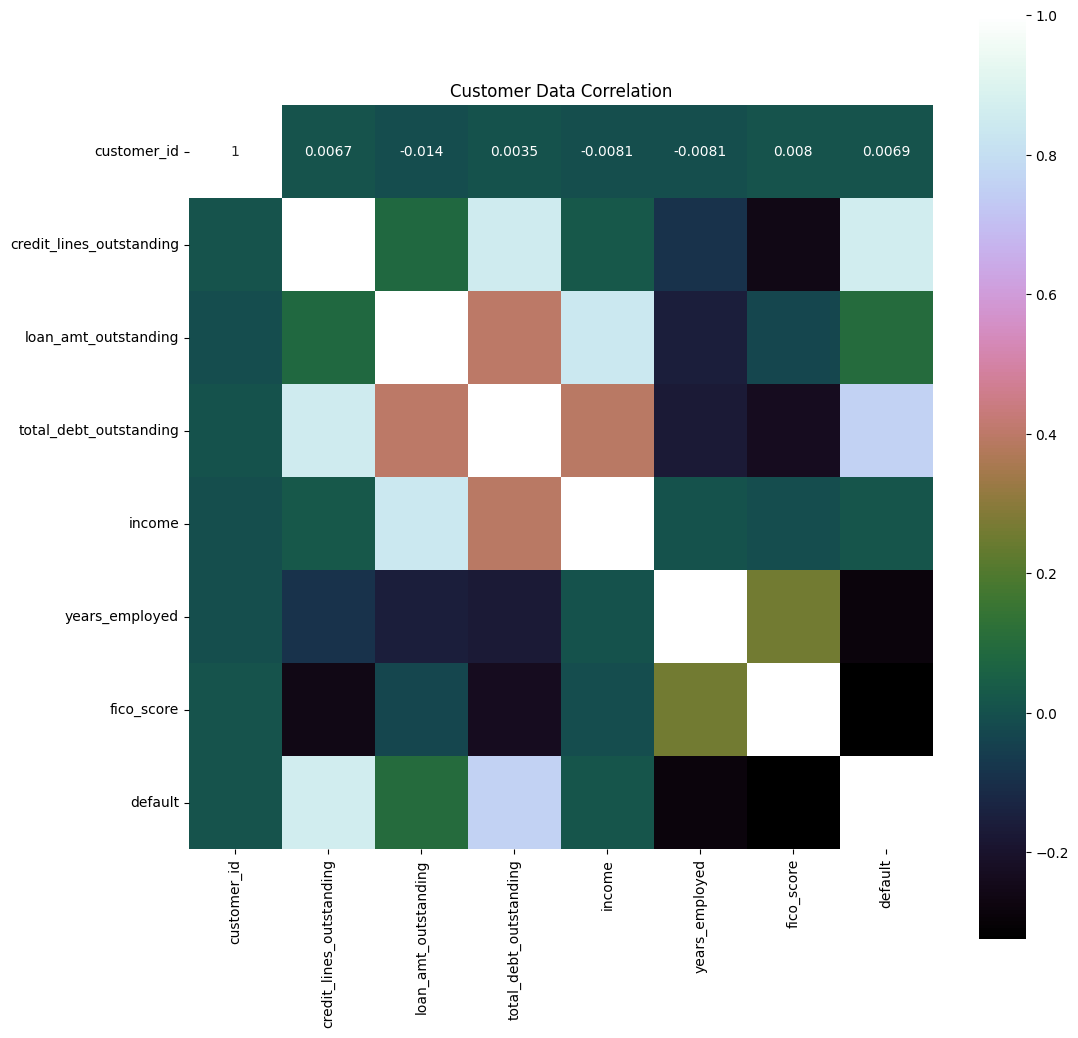

In [4]:
customer_data_correlation = customer_data.corr()
plt.figure(figsize=(12,12))
plt.title("Customer Data Correlation")
sns.heatmap(customer_data_correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

In [5]:
# Dropping columns with low correlation
default_correlation = abs(customer_data_correlation['default'])
list_to_be_dropped = sorted(list(default_correlation[default_correlation < 0.3].index))
list_to_be_dropped

['customer_id', 'income', 'loan_amt_outstanding', 'years_employed']

In [6]:
customer_data.drop(labels=list_to_be_dropped, axis=1, inplace=True)

In [7]:
customer_data

,credit_lines_outstanding,total_debt_outstanding,fico_score,default
0,0,3915.471226,605,0
1,5,8228.752520,572,1
2,0,2027.830850,602,0
3,0,2501.730397,612,0
4,1,1768.826187,631,0
...,...,...,...,...
9995,0,2553.733144,697,0
9996,1,5458.163525,615,0
9997,2,4813.090925,596,0
9998,0,1043.099660,647,0


In [8]:
# Training and Model selection
Y = customer_data['default']
X = customer_dmata.loc[:, customer_data.columns != 'default']
validation_size = 0.2
seed = 7
X_TRAIN, X_VALIDATION, Y_TRAIN, Y_VALIDATION = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
num_folds = 10
scoring = 'roc_auc'

In [12]:
models = []
models.append(('Logistic_Regression', LogisticRegression()))
models.append(('Linear_Discriminant_Analysis', LinearDiscriminantAnalysis()))
models.append(('K_Nearest_Neighbors', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Neural_Net', MLPClassifier()))
models.append(('Ada_Boost', AdaBoostClassifier()))
models.append(('Gradient_Boost', GradientBoostingClassifier()))
models.append(('Random_Forest_Classifer', RandomForestClassifier()))
models.append(('Extra_Trees_Classifier', ExtraTreesClassifier()))

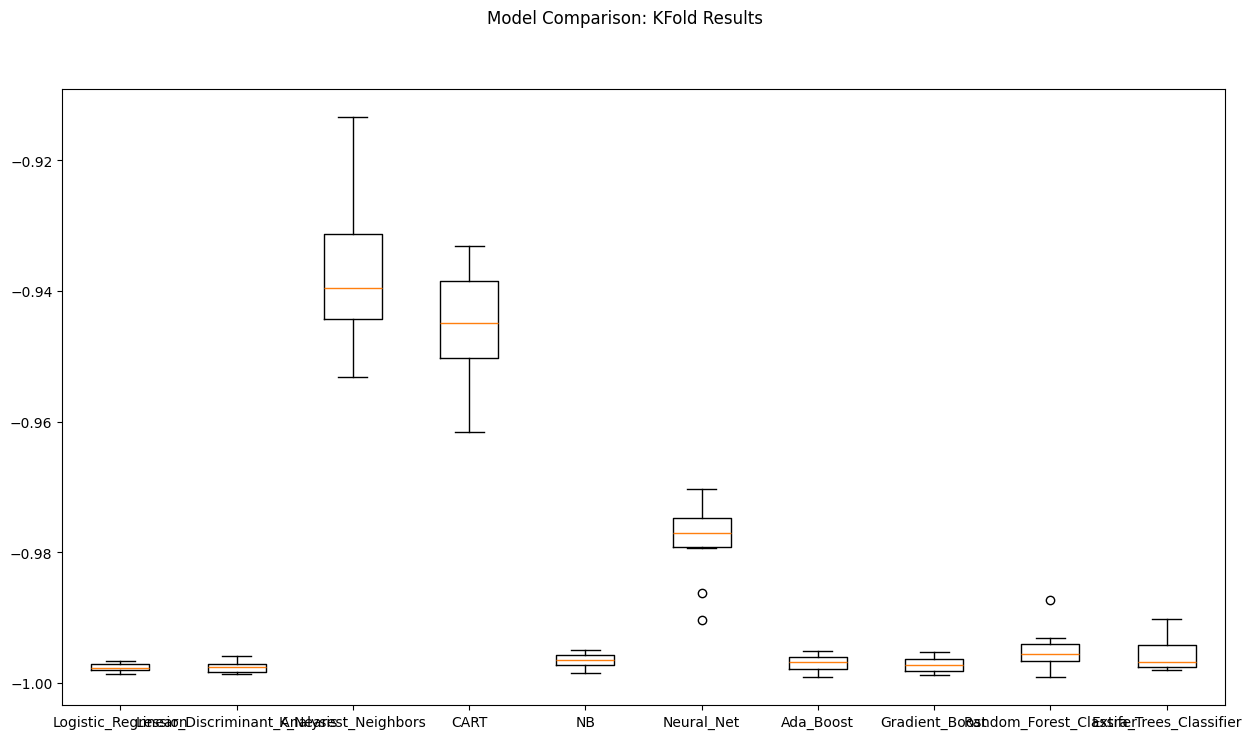

In [23]:
model_names = []
k_fold_results = []
test_results = []
train_results = []
for name, model in models:
    model_names.append(name)
    # K Fold analysis
    k_fold = KFold(n_splits=num_folds, shuffle=True)
    # Converted mean squared error to positive. The lower the better
    cross_validation_results = -1*cross_val_score(model, X_TRAIN, Y_TRAIN, cv=k_fold, scoring=scoring)
    k_fold_results.append(cross_validation_results)
    result = model.fit(X_TRAIN, Y_TRAIN)
    training_result = mean_squared_error(result.predict(X_TRAIN), Y_TRAIN)
    train_results.append(training_result)
    testing_result = mean_squared_error(result.predict(X_VALIDATION), Y_VALIDATION)
    test_results.append(testing_result)
    
fig = plt.figure()
fig.suptitle("Model Comparison: KFold Results")
axis = fig.add_subplot(111)
plt.boxplot(k_fold_results)
axis.set_xticklabels(model_names)
fig.set_size_inches(15, 8)
plt.show()

In [26]:
# GBM Model Tuning
n_estimators = [20, 180]
max_depth = [3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
k_fold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=k_fold)
grid_result = grid.fit(X_TRAIN, Y_TRAIN)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: 0.996689 using {'max_depth': 3, 'n_estimators': 180}


In [28]:
n_estimators = [20, 180]
param_grid = dict(n_estimators=n_estimators)
model = AdaBoostClassifier()
k_fold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=k_fold)
grid_result = grid.fit(X_TRAIN, Y_TRAIN)
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: 0.997205 using {'n_estimators': 20}


In [30]:
model_1 = GradientBoostingClassifier(max_depth=5, n_estimators=180)
model_1.fit(X_TRAIN, Y_TRAIN)
model_1_predictions = model_1.predict(X_VALIDATION)
model_1_accuracy = accuracy_score(Y_VALIDATION, model_1_predictions)
model_1_accuracy

0.978

In [32]:
model_2 = AdaBoostClassifier(n_estimators=20)
model_2.fit(X_TRAIN, Y_TRAIN)
model_2_predictions = model_2.predict(X_VALIDATION)
model_2_accuracy = accuracy_score(Y_VALIDATION, model_2_predictions)
model_2_accuracy

0.978

In [74]:
data = [[3, 11838.45, 720]]
df = pd.DataFrame(data, columns=['credit_lines_outstanding', 'total_debt_outstanding', 'fico_score'])
df

,credit_lines_outstanding,total_debt_outstanding,fico_score
0,3,11838.45,720


In [75]:
model_1.predict_proba(df)

array([[0.95686563, 0.04313437]])

In [76]:
def loan_default_predictor(data):
    prediction = model_1.predict(data)
    probability = max(model_1.predict_proba(data)[0])
    if prediction[0] == 1:
        return f"Client will likely default, with a {(probability * 100):.2f}% likelihood"
    elif prediction[0] == 0:
        return f"Client unlikely to default, with a {(probability * 100):.2f}% likelihood"

In [77]:
loan_default_predictor(df)

'Client unlikely to default, with a 95.69% likelihood'